In [65]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import mean_squared_error

from scipy.sparse.linalg import svds # for sparse matrices

In [66]:
from datetime import datetime

In [67]:
sale = pd.read_csv("sales_with_customer_id.csv")

In [68]:
sale.head()

,_Date,Order_ID,Invoice,Portal,Style,SKU,Qty,Unit_Price,Currency,conversion_rate,...,Entity,Voucher_Type_Name,Original_Invoice_Date,Original_Sale_No,Channel_Invoice_Created,Channel_Party_GSTIN,Billing_Party_Code,Tax_Verification,GST_Registration_Type,Customer ID
0,02-04-2022,404-9365790-8203566,IN-27,Amazon TBS,JNE3686,JNE3686-TU-XXL,1,424.76,INR,1.0,...,NEW_INVOICE,Sales,02-04-2022,404-9365790-8203566,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,7305
1,02-04-2022,402-0670618-4837911,IN-35,Amazon TBS,JNE3670,JNE3670-TU-XS,1,380.00,INR,1.0,...,NEW_INVOICE,Sales,02-04-2022,402-0670618-4837911,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,43100
2,02-04-2022,403-0895877-7397109,IN-46,Amazon TBS,JNE3797,JNE3797-KR-L,1,680.96,INR,1.0,...,NEW_INVOICE,Sales,02-04-2022,403-0895877-7397109,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,56765
3,02-04-2022,171-0515508-9326733,IN-119,Amazon TBS,J0117,J0117-TP-XXXL,1,475.24,INR,1.0,...,NEW_INVOICE,Sales,02-04-2022,171-0515508-9326733,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,95449
4,02-04-2022,402-3010573-2461150,IN-128,Amazon TBS,SET110,SET110-KR-PP-S,1,694.28,INR,1.0,...,NEW_INVOICE,Sales,02-04-2022,402-3010573-2461150,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,26758


In [69]:
sale.columns

Index(['_Date', 'Order_ID', 'Invoice', 'Portal', 'Style', 'SKU', 'Qty',
       'Unit_Price', 'Currency', 'conversion_rate', 'Amount', 'Customer_Name',
       'City', 'State', 'Shipping_Address_Country', 'Shipping_Address_Pincode',
       'Shipping_Address_Phone', 'Shipping_Provider', 'Sales', 'Sales_Ledger',
       'CGST_Rate', 'SGST_Rate', 'IGST_Rate', 'UTGST_Rate', 'CESS_Rate',
       'Other_charges', 'Other_charges_Ledger', 'Discount_Amount', 'Godown',
       'Dispatch_Date_Cancellation_Date', 'Narration', 'Entity',
       'Voucher_Type_Name', 'Original_Invoice_Date', 'Original_Sale_No',
       'Channel_Invoice_Created', 'Channel_Party_GSTIN', 'Billing_Party_Code',
       'Tax_Verification', 'GST_Registration_Type', 'Customer ID'],
      dtype='object')

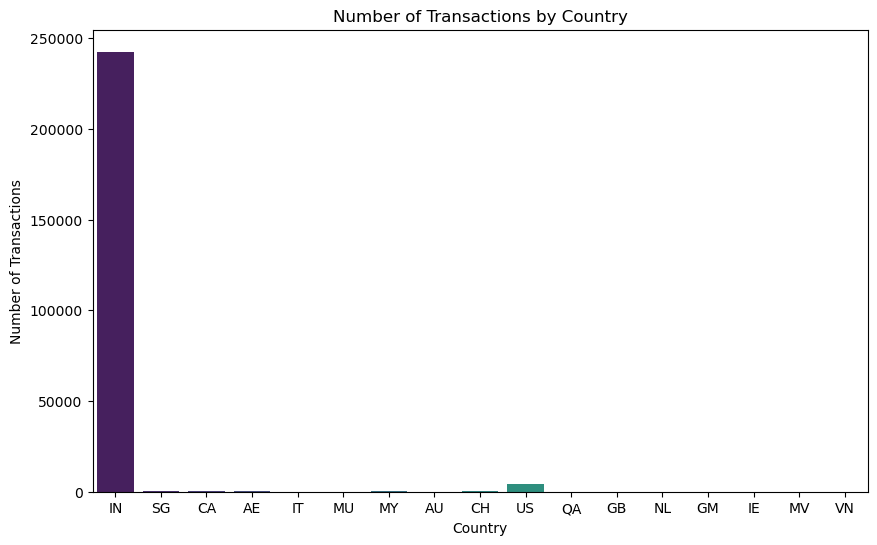

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Shipping_Address_Country', data=sale, palette='viridis')
plt.title('Number of Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.show()

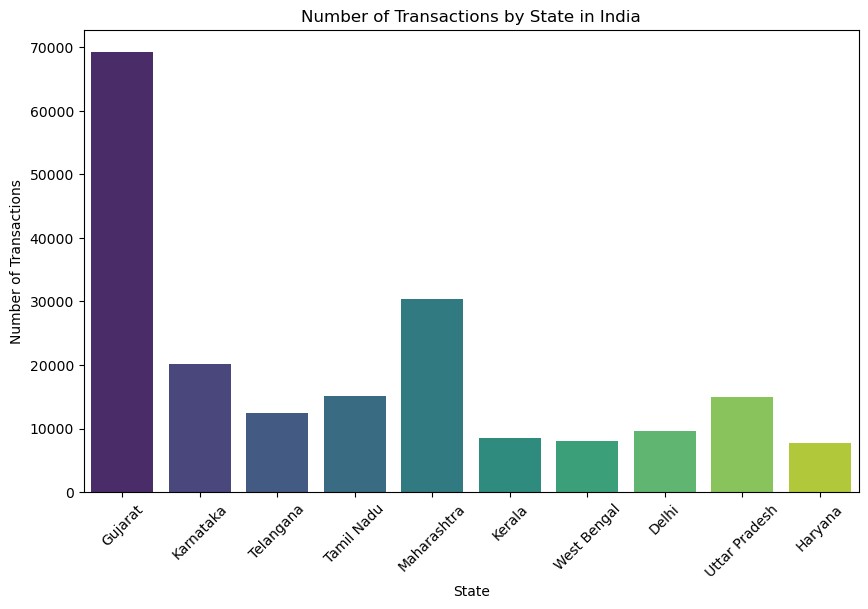

In [8]:
top_10_states = sale['State'].value_counts().nlargest(10).index
sale_top_10_state = sale[sale['State'].isin(top_10_states)]
plt.figure(figsize=(10, 6))
sns.countplot(x='State', data=sale_top_10_state, palette='viridis')
plt.title('Number of Transactions by State in India')
plt.xlabel('State')
plt.ylabel('Number of Transactions')
plt.xticks(rotation = 45)
plt.show()

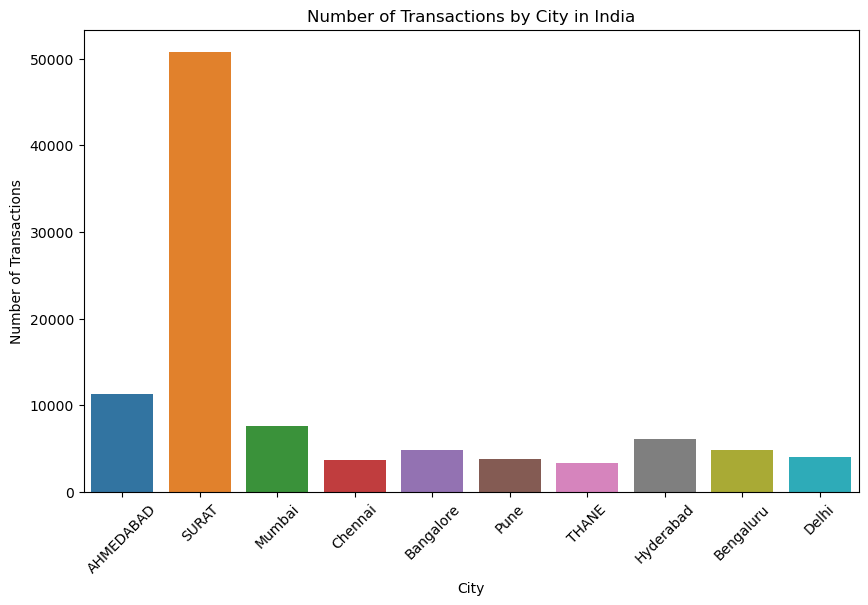

In [9]:
top_10_city = sale['City'].value_counts().nlargest(10).index
sale_top_10_city = sale[sale['City'].isin(top_10_city)]
plt.figure(figsize=(10, 6))
sns.countplot(x='City', data=sale_top_10_city)
plt.title('Number of Transactions by City in India')
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.xticks(rotation = 45)
plt.show()

In [10]:
sale['Original_Invoice_Date'] = pd.to_datetime(sale['Original_Invoice_Date'], dayfirst=True)
sale.head()

,_Date,Order_ID,Invoice,Portal,Style,SKU,Qty,Unit_Price,Currency,conversion_rate,...,Entity,Voucher_Type_Name,Original_Invoice_Date,Original_Sale_No,Channel_Invoice_Created,Channel_Party_GSTIN,Billing_Party_Code,Tax_Verification,GST_Registration_Type,Customer ID
0,02-04-2022,404-9365790-8203566,IN-27,Amazon TBS,JNE3686,JNE3686-TU-XXL,1,424.76,INR,1.0,...,NEW_INVOICE,Sales,2022-04-02,404-9365790-8203566,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,7305
1,02-04-2022,402-0670618-4837911,IN-35,Amazon TBS,JNE3670,JNE3670-TU-XS,1,380.00,INR,1.0,...,NEW_INVOICE,Sales,2022-04-02,402-0670618-4837911,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,43100
2,02-04-2022,403-0895877-7397109,IN-46,Amazon TBS,JNE3797,JNE3797-KR-L,1,680.96,INR,1.0,...,NEW_INVOICE,Sales,2022-04-02,403-0895877-7397109,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,56765
3,02-04-2022,171-0515508-9326733,IN-119,Amazon TBS,J0117,J0117-TP-XXXL,1,475.24,INR,1.0,...,NEW_INVOICE,Sales,2022-04-02,171-0515508-9326733,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,95449
4,02-04-2022,402-3010573-2461150,IN-128,Amazon TBS,SET110,SET110-KR-PP-S,1,694.28,INR,1.0,...,NEW_INVOICE,Sales,2022-04-02,402-3010573-2461150,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,26758


In [11]:
grouping = sale.groupby('Customer ID')['Original_Invoice_Date']
sale['Cohort_Date'] = grouping.transform('min')
sale.head()

,_Date,Order_ID,Invoice,Portal,Style,SKU,Qty,Unit_Price,Currency,conversion_rate,...,Voucher_Type_Name,Original_Invoice_Date,Original_Sale_No,Channel_Invoice_Created,Channel_Party_GSTIN,Billing_Party_Code,Tax_Verification,GST_Registration_Type,Customer ID,Cohort_Date
0,02-04-2022,404-9365790-8203566,IN-27,Amazon TBS,JNE3686,JNE3686-TU-XXL,1,424.76,INR,1.0,...,Sales,2022-04-02,404-9365790-8203566,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,7305,2022-04-02
1,02-04-2022,402-0670618-4837911,IN-35,Amazon TBS,JNE3670,JNE3670-TU-XS,1,380.00,INR,1.0,...,Sales,2022-04-02,402-0670618-4837911,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,43100,2022-04-02
2,02-04-2022,403-0895877-7397109,IN-46,Amazon TBS,JNE3797,JNE3797-KR-L,1,680.96,INR,1.0,...,Sales,2022-04-02,403-0895877-7397109,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,56765,2022-04-02
3,02-04-2022,171-0515508-9326733,IN-119,Amazon TBS,J0117,J0117-TP-XXXL,1,475.24,INR,1.0,...,Sales,2022-04-02,171-0515508-9326733,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,95449,2022-04-02
4,02-04-2022,402-3010573-2461150,IN-128,Amazon TBS,SET110,SET110-KR-PP-S,1,694.28,INR,1.0,...,Sales,2022-04-02,402-3010573-2461150,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,26758,2022-04-02


In [12]:
def get_date_int(df, column):    
    date_time = str(df[column])
    list = date_time.split('-')
    year = list[0][-4:] 
    month = list[1]
    day = list[2][0:2]
    return year, month, day
invoice_year, invoice_month, _ = get_date_int(sale, 'Original_Invoice_Date') 
cohort_year, cohort_month, _ = get_date_int(sale, 'Cohort_Date')
years_diff = int(invoice_year.strip()) - int(cohort_year.strip())
months_diff = int(invoice_month.strip()) - int(cohort_month.strip())
sale['CohortIndex'] = years_diff * 12 + months_diff
sale.head()

,_Date,Order_ID,Invoice,Portal,Style,SKU,Qty,Unit_Price,Currency,conversion_rate,...,Original_Invoice_Date,Original_Sale_No,Channel_Invoice_Created,Channel_Party_GSTIN,Billing_Party_Code,Tax_Verification,GST_Registration_Type,Customer ID,Cohort_Date,CohortIndex
0,02-04-2022,404-9365790-8203566,IN-27,Amazon TBS,JNE3686,JNE3686-TU-XXL,1,424.76,INR,1.0,...,2022-04-02,404-9365790-8203566,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,7305,2022-04-02,0
1,02-04-2022,402-0670618-4837911,IN-35,Amazon TBS,JNE3670,JNE3670-TU-XS,1,380.00,INR,1.0,...,2022-04-02,402-0670618-4837911,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,43100,2022-04-02,0
2,02-04-2022,403-0895877-7397109,IN-46,Amazon TBS,JNE3797,JNE3797-KR-L,1,680.96,INR,1.0,...,2022-04-02,403-0895877-7397109,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,56765,2022-04-02,0
3,02-04-2022,171-0515508-9326733,IN-119,Amazon TBS,J0117,J0117-TP-XXXL,1,475.24,INR,1.0,...,2022-04-02,171-0515508-9326733,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,95449,2022-04-02,0
4,02-04-2022,402-3010573-2461150,IN-128,Amazon TBS,SET110,SET110-KR-PP-S,1,694.28,INR,1.0,...,2022-04-02,402-3010573-2461150,01-04-2022 05:30,24AAKFT0982E1Z6,prabhat,1,Consumer,26758,2022-04-02,0


In [13]:
cohort_counts = sale.groupby(['Cohort_Date', 'CohortIndex'])['Customer ID'].nunique().reset_index()

# Pivot the table to create the cohort analysis matrix
cohort_matrix = cohort_counts.pivot_table(index='Cohort_Date', columns='CohortIndex', values='Customer ID')

print(cohort_matrix)

CohortIndex       0
Cohort_Date        
2022-04-01   2031.0
2022-04-02   1770.0
2022-04-03   2186.0
2022-04-04   2113.0
2022-04-05   1994.0
...             ...
2022-06-24    815.0
2022-06-25    767.0
2022-06-26    640.0
2022-06-27   1124.0
2022-06-28    645.0

[89 rows x 1 columns]


In [14]:
cohort_sizes = cohort_counts.iloc[:,0]
print(cohort_counts)
print(cohort_sizes)
# # Divide all values in the cohort_counts table by cohort_sizes
# retention = cohort_counts.divide(cohort_sizes, axis=0)
# # Check the retention table
# retention.round(3) * 100
# # Drawing a heatmap
# plt.figure(figsize=(10, 8))
# plt.title('Retention rates')
# sns.heatmap(data = retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap = 'BuGn')
# plt.show()

   Cohort_Date  CohortIndex  Customer ID
0   2022-04-01            0         2031
1   2022-04-02            0         1770
2   2022-04-03            0         2186
3   2022-04-04            0         2113
4   2022-04-05            0         1994
..         ...          ...          ...
84  2022-06-24            0          815
85  2022-06-25            0          767
86  2022-06-26            0          640
87  2022-06-27            0         1124
88  2022-06-28            0          645

[89 rows x 3 columns]
0    2022-04-01
1    2022-04-02
2    2022-04-03
3    2022-04-04
4    2022-04-05
        ...    
84   2022-06-24
85   2022-06-25
86   2022-06-26
87   2022-06-27
88   2022-06-28
Name: Cohort_Date, Length: 89, dtype: datetime64[ns]


In [15]:
sale['Amount'].describe()

count    248062.000000
mean        877.338948
std         511.264794
min           1.000000
25%         633.000000
50%         699.000000
75%         989.000000
max       12593.390000
Name: Amount, dtype: float64

In [16]:
snapshot_date = datetime(2022, 6, 29)

In [17]:
# Aggregate data on a customer level
data = sale.groupby(['Customer ID'],as_index=False).agg({
'Original_Invoice_Date': lambda x: (snapshot_date - x.max()).days,
'Invoice': 'count',
'Amount': 'sum'}).rename(columns = {'Original_Invoice_Date': 'Recency','Invoice': 'Frequency', 'Amount': 'MonetaryValue'})

In [18]:
data

,Customer ID,Recency,Frequency,MonetaryValue
0,0,10,1,1679.00
1,1,26,1,859.00
2,2,69,1,1090.00
3,3,82,1,885.00
4,4,44,1,980.00
...,...,...,...,...
100552,100552,65,1,340.00
100553,100553,16,1,618.00
100554,100554,76,2,2480.00
100555,100555,43,1,481.00


In [19]:
quartiles = data[['Recency', 'Frequency', 'MonetaryValue']].quantile([0.25, 0.5, 0.75])
# Step 3: Calculate RFM Score
def rfm_score(x, metric):
    if x <= quartiles[metric][0.25]:
        return 1
    elif x <= quartiles[metric][0.50]:
        return 2
    elif x <= quartiles[metric][0.75]:
        return 3
    else:
        return 4
data['R'] = data['Recency'].apply(rfm_score, args=('Recency',))
data['F'] = data['Frequency'].apply(rfm_score, args=('Frequency',))
data['M'] = data['MonetaryValue'].apply(rfm_score, args=('MonetaryValue',))

# Step 4: Collate into RFM Segment
data['RFM_Segment'] = data['R'].map(str) + data['F'].map(str) + data['M'].map(str)
data['RFM_Score'] = data['R'] + data['F'] + data['M']


In [20]:
data

,Customer ID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
0,0,10,1,1679.00,1,1,4,114,6
1,1,26,1,859.00,2,1,2,212,5
2,2,69,1,1090.00,3,1,3,313,7
3,3,82,1,885.00,4,1,2,412,7
4,4,44,1,980.00,2,1,3,213,6
...,...,...,...,...,...,...,...,...,...
100552,100552,65,1,340.00,3,1,1,311,5
100553,100553,16,1,618.00,1,1,1,111,3
100554,100554,76,2,2480.00,4,4,4,444,12
100555,100555,43,1,481.00,2,1,1,211,4


In [21]:
# Group by RFM_Segment and calculate mean values
rfm_scores_analysis = data.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean'
}).reset_index()

# Rename the columns for clarity
rfm_scores_analysis.columns = ['RFM_Score', 'Mean_Recency', 'Mean_Frequency', 'Mean_MonetaryValue']

print(rfm_scores_analysis)

   RFM_Score  Mean_Recency  Mean_Frequency  Mean_MonetaryValue
0          3     11.301114        1.000000          531.587424
1          4     24.459691        1.000000          656.961392
2          5     37.644303        1.000000          793.388948
3          6     58.119091        1.001039          864.311775
4          7     65.093193        1.014647         1102.253893
5          8     67.624443        1.132216         1354.671366
6          9     29.070771       12.161959        10865.927202
7         10     41.924872        5.017743         4090.832082
8         11     63.616207        3.252671         2894.985814
9         12     79.554270        3.413256         3064.991191


In [22]:
# Function to assign segment categories
def assign_segment(RFM_Score):
    if RFM_Score >= 9:
        return 'Top'
    elif 5 <= RFM_Score < 9:
        return 'Middle'
    else:
        return 'Low'

# Apply the function to create the General_Segment column
data['General_Segment'] = data['R'] + data['F'] + data['M']
data['General_Segment'] = data['General_Segment'].astype(int)
data['General_Segment'] = data['General_Segment'].apply(assign_segment)

# Group by General_Segment and calculate mean values
general_segment_analysis = data.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean'
}).reset_index()

# Display the analysis
print(general_segment_analysis)

  General_Segment    Recency  Frequency  MonetaryValue
0             Low  20.620161   1.000000     620.378631
1          Middle  54.451841   1.021121     958.058947
2             Top  44.620696   7.512228    6601.729780


<Axes: xlabel='MonetaryValue', ylabel='Density'>

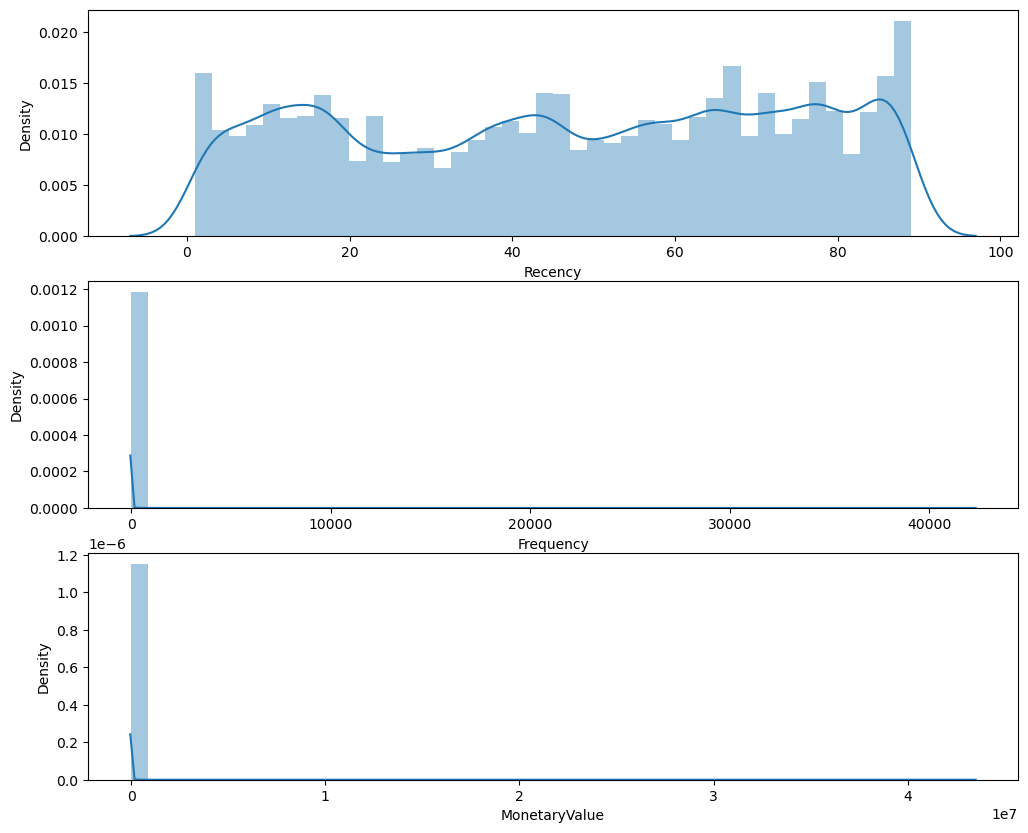

In [23]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(data['Recency'])
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(data['Frequency'])
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(data['MonetaryValue'])

In [24]:
data[['Recency', 'Frequency', 'MonetaryValue']].describe()

,Recency,Frequency,MonetaryValue
count,100557.000000,100557.000000,1.005570e+05
mean,46.877015,2.466879,2.164289e+03
std,26.585912,143.814740,1.417836e+05
min,1.000000,1.000000,3.930000e+00
25%,22.000000,1.000000,6.790000e+02
50%,48.000000,1.000000,9.350000e+02
75%,71.000000,1.000000,1.385000e+03
max,89.000000,42288.000000,4.345444e+07


In [25]:
data['MonetaryValue'] = data['MonetaryValue'].round(3)

In [26]:
# unique_values = data['MonetaryValue'].unique()
# for value in unique_values:
#     print(value)

In [27]:
data['MonetaryValue'].min()

3.93

In [28]:
from sklearn.preprocessing import StandardScaler

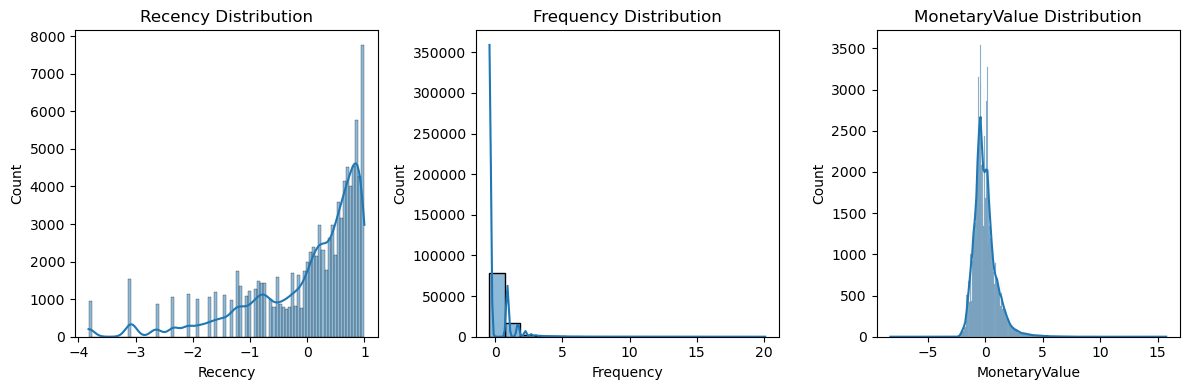

In [29]:
# Assuming you have a DataFrame named df with RFM variables: Recency, Frequency, MonetaryValue

# Apply log transformation to the RFM variables
df_log = np.log(data[['Recency', 'Frequency', 'MonetaryValue']])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the log-transformed data
df_scaled = scaler.fit_transform(df_log)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=['Recency', 'Frequency', 'MonetaryValue'])

# Plot histograms of the standardized RFM variables
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_scaled['Recency'], kde=True)
plt.title('Recency Distribution')
plt.subplot(1, 3, 2)
sns.histplot(df_scaled['Frequency'], kde=True)
plt.title('Frequency Distribution')
plt.subplot(1, 3, 3)
sns.histplot(df_scaled['MonetaryValue'], kde=True)
plt.title('MonetaryValue Distribution')
plt.tight_layout()
plt.show()


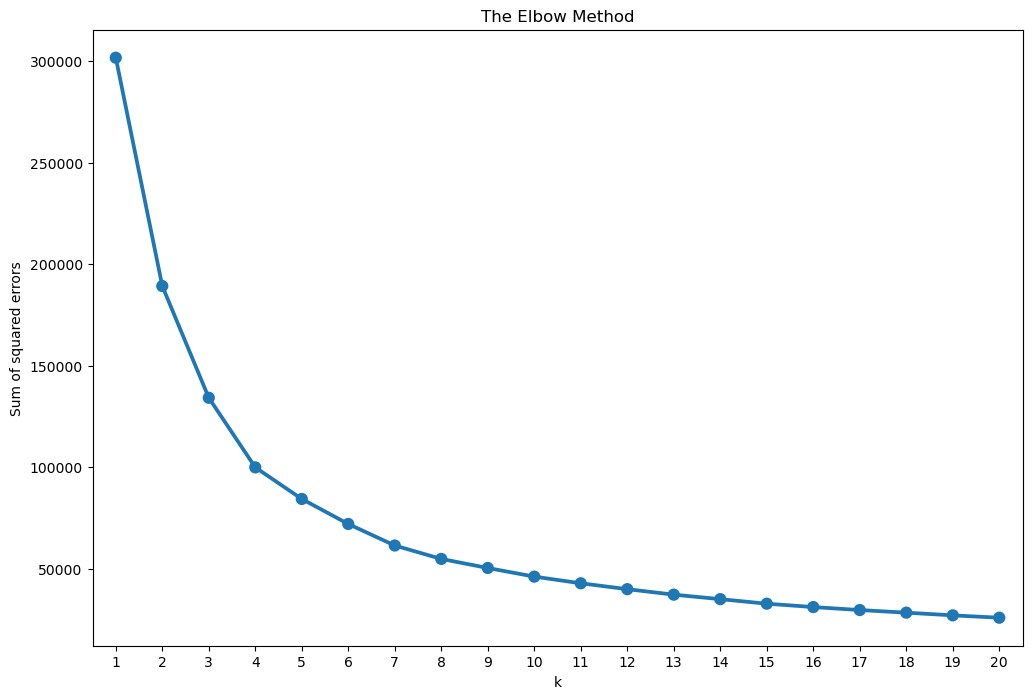

In [30]:
from sklearn.cluster import KMeans
sse = {}
# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(df_scaled)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_
# Plotting the elbow plot
plt.figure(figsize=(12,8))
plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [31]:
return_data = pd.read_csv("Return_table.csv")

In [32]:
return_data.head()

,Date,Order_ID,Invoice,Portal,Style,SKU,Qty,Unit_Price,Amount,Customer_Name,...,Entity,Voucher_Type_Name,Original_Invoice_Date,Original_Invoice_No,Invoice_Channel_Created,Return_Days,Billing_Party_Code,Tax_Verification,RP_Code,Putaway_Code
0,01-05-2022,171-2550906-4641134,RONL/1/2022-2302606,Amazon TBS,JNE3686,JNE3686-TU-XXL,1,424.76,446.00,Dhruvil mistry,...,CREDIT_NOTE,Credit Note,01-04-2022,IN-26099,31-03-2022,30,prabhat,1,RP555916,PT153492
1,02-05-2022,408-8676878-5541908,RONL/1/2022-2302789,Amazon TBS,JNE3441,JNE3441-KR-S,1,463.80,487.00,B M PATIL,...,CREDIT_NOTE,Credit Note,16-04-2022,IN-4999,15-04-2022,16,prabhat,1,RP564740,PT153639
2,09-06-2022,408-5720741-3361953,RONL/1/2022-2307524,Amazon TBS,BTM042,BTM042-PP-XL,1,0.00,0.00,Sona,...,CREDIT_NOTE,Credit Note,26-05-2022,IN-22071,25-05-2022,13,prabhat,0,PRAB1837085,PT159592
3,10-06-2022,405-3391944-5904313,RONL/1/2022-2307671,Amazon TBS,JNE3797,JNE3797-KR-XL,1,734.28,771.00,Niketa jadvani,...,CREDIT_NOTE,Credit Note,01-06-2022,IN-23371,31-05-2022,9,prabhat,1,RP584152,PT160157
4,10-06-2022,4063139572,RONL/1/2022-2307645,AJIO,SET319,SET319-KR-NP-M,2,1001.18,2242.64,AJIO Surat GJ JIT DC RIL,...,CREDIT_NOTE,Credit Note,03-06-2022,AJ/ON/1510,03-06-2022,7,AJIO_Threadbucket,0,RP584780,PT160112


In [33]:
return_data.columns

Index(['Date', 'Order_ID', 'Invoice', 'Portal', 'Style', 'SKU', 'Qty',
       'Unit_Price', 'Amount', 'Customer_Name', 'Shipping_Address_Name',
       'City', 'State', 'Shipping_Provider', 'Sales', 'Sales_Ledger',
       'CGST_Rate', 'SGST_Rate', 'IGST', 'IGST_Rate', 'UTGST_Rate',
       'CESS_Rate', 'Other_charges_Ledger', 'Other_charges_Ledger1',
       'Discount_Amount', 'Godown', 'Dispatch_Date_Cancellation_Date',
       'Entity', 'Voucher_Type_Name', 'Original_Invoice_Date',
       'Original_Invoice_No', 'Invoice_Channel_Created', 'Return_Days',
       'Billing_Party_Code', 'Tax_Verification', 'RP_Code', 'Putaway_Code'],
      dtype='object')

In [34]:
sale_return = pd.merge(sale, return_data[['Order_ID', 'Dispatch_Date_Cancellation_Date', 'Return_Days', 'RP_Code', 'Putaway_Code']], how="inner", on="Order_ID")

In [35]:
sale_return.columns

Index(['_Date', 'Order_ID', 'Invoice', 'Portal', 'Style', 'SKU', 'Qty',
       'Unit_Price', 'Currency', 'conversion_rate', 'Amount', 'Customer_Name',
       'City', 'State', 'Shipping_Address_Country', 'Shipping_Address_Pincode',
       'Shipping_Address_Phone', 'Shipping_Provider', 'Sales', 'Sales_Ledger',
       'CGST_Rate', 'SGST_Rate', 'IGST_Rate', 'UTGST_Rate', 'CESS_Rate',
       'Other_charges', 'Other_charges_Ledger', 'Discount_Amount', 'Godown',
       'Dispatch_Date_Cancellation_Date_x', 'Narration', 'Entity',
       'Voucher_Type_Name', 'Original_Invoice_Date', 'Original_Sale_No',
       'Channel_Invoice_Created', 'Channel_Party_GSTIN', 'Billing_Party_Code',
       'Tax_Verification', 'GST_Registration_Type', 'Customer ID',
       'Cohort_Date', 'CohortIndex', 'Dispatch_Date_Cancellation_Date_y',
       'Return_Days', 'RP_Code', 'Putaway_Code'],
      dtype='object')

In [36]:
sale_return.head()

,_Date,Order_ID,Invoice,Portal,Style,SKU,Qty,Unit_Price,Currency,conversion_rate,...,Billing_Party_Code,Tax_Verification,GST_Registration_Type,Customer ID,Cohort_Date,CohortIndex,Dispatch_Date_Cancellation_Date_y,Return_Days,RP_Code,Putaway_Code
0,02-04-2022,406-2177882-8357120,IN-218,Amazon TBS,NW034,NW034-TP-PJ-L,1,737.14,INR,1.0,...,prabhat,1,Consumer,93570,2022-04-02,0,02-04-2022 18:16,11,RP555937,PT152104
1,04-04-2022,403-4804006-1066718,IN-358,Amazon TBS,JNE3797,JNE3797-KR-M,1,646.89,INR,1.0,...,prabhat,1,Consumer,34755,2022-04-02,0,04-04-2022 17:38,9,RP558972,PT152154
2,04-04-2022,405-8022187-9451532,IN-657,Amazon TBS,NW030,NW030-TP-PJ-L,1,721.90,INR,1.0,...,prabhat,1,Consumer,57581,2022-04-04,0,04-04-2022 17:38,20,PRAB1748966,PT152893
3,04-04-2022,408-0349555-5444367,IN-687,Amazon TBS,SET145,SET145-KR-NP-XXL,1,644.76,INR,1.0,...,prabhat,1,Consumer,801,2022-04-04,0,04-04-2022 19:09,20,RP559571,PT152892
4,04-04-2022,408-0349555-5444367,IN-687,Amazon TBS,SET145,SET145-KR-NP-XXL,1,644.76,INR,1.0,...,prabhat,1,Consumer,801,2022-04-04,0,04-04-2022 19:09,33,RP572200,PT154069


In [37]:
return_data[return_data['Order_ID']=="406-2177882-8357120"]

,Date,Order_ID,Invoice,Portal,Style,SKU,Qty,Unit_Price,Amount,Customer_Name,...,Entity,Voucher_Type_Name,Original_Invoice_Date,Original_Invoice_No,Invoice_Channel_Created,Return_Days,Billing_Party_Code,Tax_Verification,RP_Code,Putaway_Code
386,13-04-2022,406-2177882-8357120,RONL/1/2022-2300554,Amazon TBS,NW034,NW034-TP-PJ-L,1,737.14,774.0,Yatriba Gohil,...,CREDIT_NOTE,Credit Note,02-04-2022,IN-218,01-04-2022,11,prabhat,1,RP555937,PT152104


In [38]:
len(sale_return)

38397

In [39]:
master = pd.read_csv("Master_table.csv")

In [40]:
master.columns

Index(['_SKU_Code', 'Design_No_', 'Stock', 'Category', 'Size', 'Color'], dtype='object')

In [41]:
master.rename(columns={'_SKU_Code': 'SKU'}, inplace=True)

In [42]:
combined = pd.merge(return_data, master, how="inner", on="SKU")

In [43]:
combined.columns

Index(['Date', 'Order_ID', 'Invoice', 'Portal', 'Style', 'SKU', 'Qty',
       'Unit_Price', 'Amount', 'Customer_Name', 'Shipping_Address_Name',
       'City', 'State', 'Shipping_Provider', 'Sales', 'Sales_Ledger',
       'CGST_Rate', 'SGST_Rate', 'IGST', 'IGST_Rate', 'UTGST_Rate',
       'CESS_Rate', 'Other_charges_Ledger', 'Other_charges_Ledger1',
       'Discount_Amount', 'Godown', 'Dispatch_Date_Cancellation_Date',
       'Entity', 'Voucher_Type_Name', 'Original_Invoice_Date',
       'Original_Invoice_No', 'Invoice_Channel_Created', 'Return_Days',
       'Billing_Party_Code', 'Tax_Verification', 'RP_Code', 'Putaway_Code',
       'Design_No_', 'Stock', 'Category', 'Size', 'Color'],
      dtype='object')

In [44]:
combined['Category'].describe()

count     31581
unique       17
top       KURTA
freq      12406
Name: Category, dtype: object

In [45]:
combined['Category'].value_counts()

Category
KURTA                   12406
KURTA SET                5541
TOP                      4409
DRESS                    3921
SET                      2041
BLOUSE                   1338
TUNIC                     507
CROP TOP WITH PLAZZO      364
NIGHT WEAR                333
PANT                      171
JUMPSUIT                  139
LEHENGA CHOLI             131
PALAZZO                    88
CROP TOP                   87
SAREE                      68
AN : LEGGINGS              25
CARDIGAN                   12
Name: count, dtype: int64

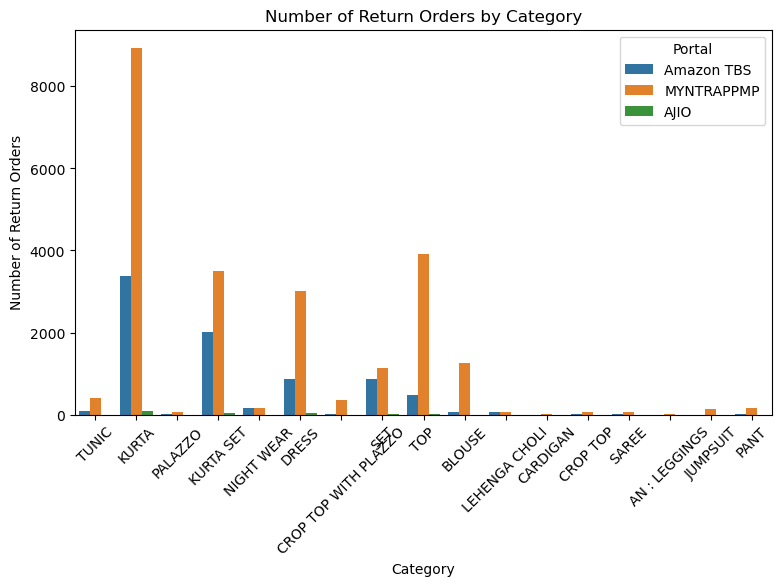

In [46]:
plt.figure(figsize=(9, 5))
sns.countplot(x='Category', data=combined, hue='Portal')
plt.title('Number of Return Orders by Category')
plt.xlabel('Category')
plt.ylabel('Number of Return Orders')
plt.xticks(rotation = 45)
plt.show()

In [47]:
combined[combined['Category']=='KURTA']['Portal'].value_counts()

Portal
MYNTRAPPMP    8932
Amazon TBS    3389
AJIO            85
Name: count, dtype: int64

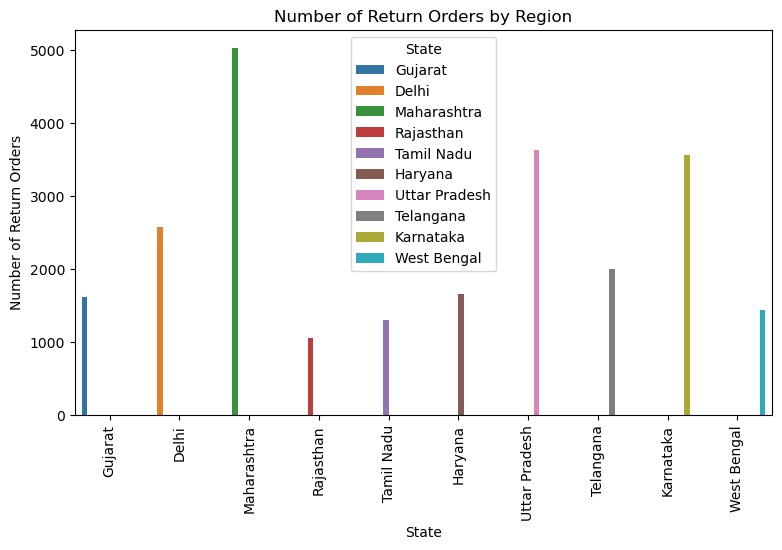

In [56]:
top_10_states = combined['State'].value_counts().nlargest(10).index
# top_10_states
kurta_return_top_10_state = combined[combined['State'].isin(top_10_states)]
plt.figure(figsize=(9, 5))
sns.countplot(x='State', data=kurta_return_top_10_state, hue='State')
plt.title('Number of Return Orders by Region')
plt.xlabel('State')
plt.ylabel('Number of Return Orders')
plt.xticks(rotation = 90)
plt.show()

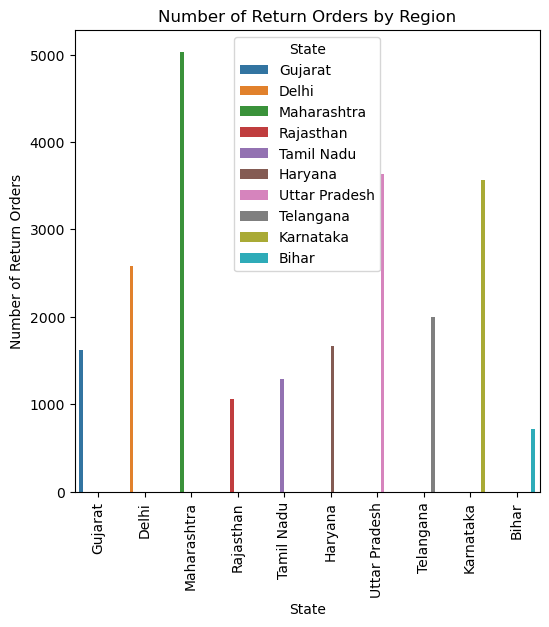

In [53]:
top_10_states = combined[combined['Category']=='KURTA SET']['State'].value_counts().nlargest(10).index
# top_10_states
kurta_return_top_10_state = combined[combined['State'].isin(top_10_states)]
plt.figure(figsize=(6, 6))
sns.countplot(x='State', data=kurta_return_top_10_state, hue='State')
plt.title('Number of Return Orders by Region')
plt.xlabel('State')
plt.ylabel('Number of Return Orders')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
top_10_states = combined[combined['Category']=='TOP']['State'].value_counts().nlargest(10).index
# top_10_states
kurta_return_top_10_state = combined[combined['State'].isin(top_10_states)]
plt.figure(figsize=(10, 4))
sns.countplot(x='State', data=kurta_return_top_10_state, hue='State')
plt.title('Number of TOP Return Orders by Region')
plt.xlabel('State')
plt.ylabel('Number of Return Orders')
plt.xticks(rotation = 90)
plt.show()

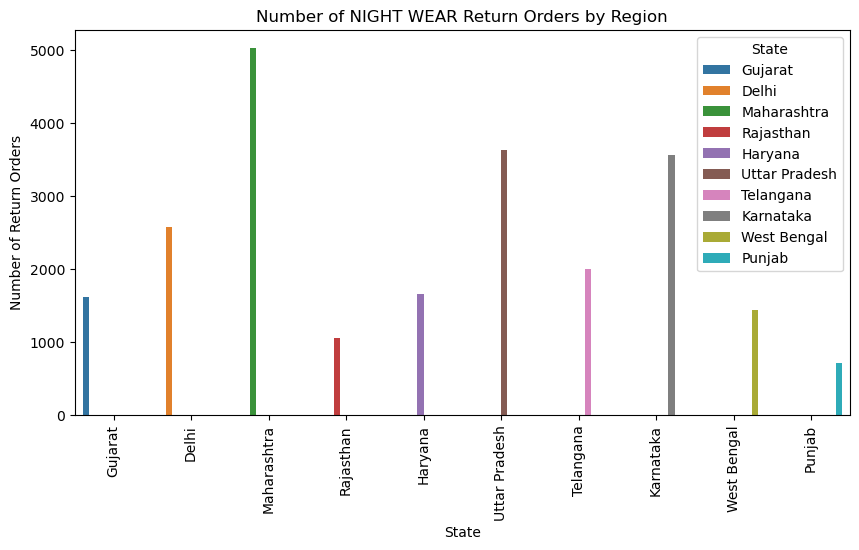

In [72]:
top_10_states = combined[combined['Category']=='NIGHT WEAR']['State'].value_counts().nlargest(10).index
# top_10_states
kurta_return_top_10_state = combined[combined['State'].isin(top_10_states)]
plt.figure(figsize=(10, 5))
sns.countplot(x='State', data=kurta_return_top_10_state, hue='State')
plt.title('Number of NIGHT WEAR Return Orders by Region')
plt.xlabel('State')
plt.ylabel('Number of Return Orders')
plt.xticks(rotation = 90)
plt.show()

In [51]:
combined['Category'].unique()

array(['TUNIC', 'KURTA', 'PALAZZO', 'KURTA SET', 'NIGHT WEAR', 'DRESS',
       'CROP TOP WITH PLAZZO', 'SET', 'TOP', 'BLOUSE', 'LEHENGA CHOLI',
       'CARDIGAN', 'CROP TOP', 'SAREE', 'AN : LEGGINGS', 'JUMPSUIT',
       'PANT'], dtype=object)

In [52]:
supreme = pd.merge(sale, return_data[['Order_ID', 'Dispatch_Date_Cancellation_Date', 'Return_Days', 'RP_Code', 'Putaway_Code']], how="left", on="Order_ID")

In [53]:
len(supreme)

256404

In [54]:
supreme.columns

Index(['_Date', 'Order_ID', 'Invoice', 'Portal', 'Style', 'SKU', 'Qty',
       'Unit_Price', 'Currency', 'conversion_rate', 'Amount', 'Customer_Name',
       'City', 'State', 'Shipping_Address_Country', 'Shipping_Address_Pincode',
       'Shipping_Address_Phone', 'Shipping_Provider', 'Sales', 'Sales_Ledger',
       'CGST_Rate', 'SGST_Rate', 'IGST_Rate', 'UTGST_Rate', 'CESS_Rate',
       'Other_charges', 'Other_charges_Ledger', 'Discount_Amount', 'Godown',
       'Dispatch_Date_Cancellation_Date_x', 'Narration', 'Entity',
       'Voucher_Type_Name', 'Original_Invoice_Date', 'Original_Sale_No',
       'Channel_Invoice_Created', 'Channel_Party_GSTIN', 'Billing_Party_Code',
       'Tax_Verification', 'GST_Registration_Type', 'Customer ID',
       'Cohort_Date', 'CohortIndex', 'Dispatch_Date_Cancellation_Date_y',
       'Return_Days', 'RP_Code', 'Putaway_Code'],
      dtype='object')

In [55]:
master.columns

Index(['SKU', 'Design_No_', 'Stock', 'Category', 'Size', 'Color'], dtype='object')

In [56]:
final_table = pd.merge(supreme, master, how="inner", on="SKU")

In [57]:
final_table.to_csv("Retail_data.csv", index=False)

In [58]:
final_table.columns

Index(['_Date', 'Order_ID', 'Invoice', 'Portal', 'Style', 'SKU', 'Qty',
       'Unit_Price', 'Currency', 'conversion_rate', 'Amount', 'Customer_Name',
       'City', 'State', 'Shipping_Address_Country', 'Shipping_Address_Pincode',
       'Shipping_Address_Phone', 'Shipping_Provider', 'Sales', 'Sales_Ledger',
       'CGST_Rate', 'SGST_Rate', 'IGST_Rate', 'UTGST_Rate', 'CESS_Rate',
       'Other_charges', 'Other_charges_Ledger', 'Discount_Amount', 'Godown',
       'Dispatch_Date_Cancellation_Date_x', 'Narration', 'Entity',
       'Voucher_Type_Name', 'Original_Invoice_Date', 'Original_Sale_No',
       'Channel_Invoice_Created', 'Channel_Party_GSTIN', 'Billing_Party_Code',
       'Tax_Verification', 'GST_Registration_Type', 'Customer ID',
       'Cohort_Date', 'CohortIndex', 'Dispatch_Date_Cancellation_Date_y',
       'Return_Days', 'RP_Code', 'Putaway_Code', 'Design_No_', 'Stock',
       'Category', 'Size', 'Color'],
      dtype='object')

In [59]:
final_table[['Amount', 'Sales']]

,Amount,Sales
0,495.0,424.76
1,495.0,424.76
2,481.0,411.43
3,474.0,404.76
4,474.0,404.76
...,...,...
256165,1344.0,1200.00
256166,1344.0,1200.00
256167,1263.0,1127.68
256168,1263.0,1127.68


In [60]:
data.head()

,Customer ID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
0,0,10,1,1679.0,1,1,4,114,6,Middle
1,1,26,1,859.0,2,1,2,212,5,Middle
2,2,69,1,1090.0,3,1,3,313,7,Middle
3,3,82,1,885.0,4,1,2,412,7,Middle
4,4,44,1,980.0,2,1,3,213,6,Middle


In [61]:
df = pd.read_csv('Retail_data.csv')

df_copy = df.copy(deep=True) #Copying the data to another dataframe

In [62]:
columns_to_keep = ['Customer ID', 'Portal', 'Unit_Price', 'City', 'Category', 'Size', 'Color', 'SKU']
df_copy = df.loc[:, columns_to_keep]

In [63]:
df_copy.head()

,Customer ID,Portal,Unit_Price,City,Category,Size,Color,SKU
0,7305,Amazon TBS,424.76,GANDHINAGAR,TUNIC,XXL,White,JNE3686-TU-XXL
1,17095,Amazon TBS,424.76,SURAT,TUNIC,XXL,White,JNE3686-TU-XXL
2,19481,Amazon TBS,411.43,NEW DELHI,TUNIC,XXL,White,JNE3686-TU-XXL
3,34460,Amazon TBS,404.76,CHENNAI,TUNIC,XXL,White,JNE3686-TU-XXL
4,56677,Amazon TBS,404.76,NOIDA,TUNIC,XXL,White,JNE3686-TU-XXL


In [64]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256170 entries, 0 to 256169
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Customer ID  256170 non-null  int64  
 1   Portal       256170 non-null  object 
 2   Unit_Price   256170 non-null  float64
 3   City         256170 non-null  object 
 4   Category     256170 non-null  object 
 5   Size         256170 non-null  object 
 6   Color        256170 non-null  object 
 7   SKU          256170 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 15.6+ MB


In [65]:
df_copy.isna().sum()

Customer ID    0
Portal         0
Unit_Price     0
City           0
Category       0
Size           0
Color          0
SKU            0
dtype: int64